In [19]:
import pandas as pd #untuk dataframe
import pylab as pl #untuk plotting
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [11]:
data = pd.read_csv('android_traffic.csv', sep=';')

In [12]:
# melihat 5 baris pertama data
data.head()

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign


In [13]:
cdata = data[['tcp_packets','dist_port_tcp','external_ips','vulume_bytes', 'udp_packets','tcp_urg_packet','source_app_packets', 'remote_app_packets', 'source_app_bytes', 'remote_app_bytes', 'source_app_packets.1', 'dns_query_times', 'type']]
cdata.head(10)

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times,type
0,36,6,3,3911,0,0,39,33,5100,4140,39,3,benign
1,117,0,9,23514,0,0,128,107,26248,24358,128,11,benign
2,196,0,6,24151,0,0,205,214,163887,24867,205,9,benign
3,6,0,1,889,0,0,7,6,819,975,7,1,benign
4,6,0,1,882,0,0,7,6,819,968,7,1,benign
5,54,54,3,5062,0,0,63,54,5457,5719,63,9,benign
6,6,0,1,889,0,0,7,6,819,975,7,1,benign
7,6,0,1,1154,0,0,7,6,593,1228,7,1,benign
8,6,0,1,888,0,0,7,6,819,974,7,1,benign
9,196,0,3,16110,0,0,200,264,300472,16410,200,4,benign


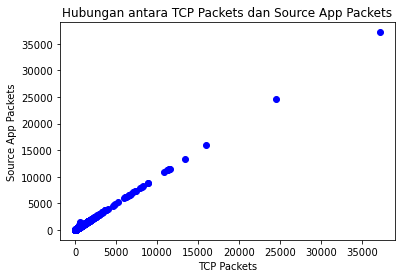

In [14]:
import matplotlib.pyplot as plt

plt.scatter(cdata.tcp_packets, cdata.source_app_packets, color = 'blue')
plt.xlabel('TCP Packets')
plt.ylabel('Source App Packets')
plt.title('Hubungan antara TCP Packets dan Source App Packets')
plt.show()


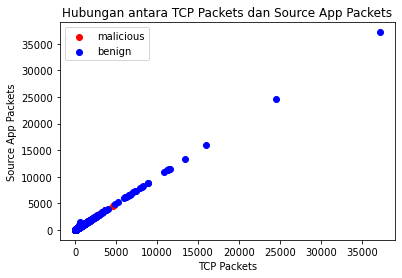

In [15]:
# Contoh menggunakan warna yang berbeda untuk setiap kelas
plt.scatter(cdata[cdata['type'] == 'malicious'].tcp_packets, cdata[cdata['type'] == 'malicious'].source_app_packets, color='red', label ='malicious')
plt.scatter(cdata[cdata['type'] == 'benign'].tcp_packets, cdata[cdata['type'] == 'benign'].source_app_packets, color='blue', label ='benign')
plt.xlabel('TCP Packets')
plt.ylabel('Source App Packets')
plt.title('Hubungan antara TCP Packets dan Source App Packets')
plt.legend()
plt.show()


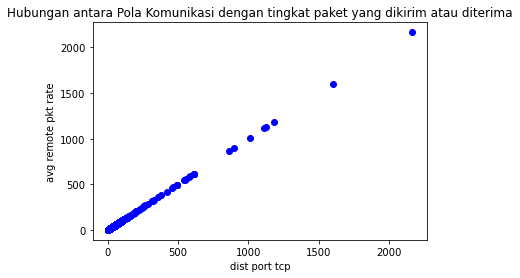

In [16]:

plt.scatter(cdata.dist_port_tcp, cdata.dist_port_tcp, color = 'blue')
plt.xlabel('dist port tcp')
plt.ylabel('avg remote pkt rate')
plt.title('Hubungan antara Pola Komunikasi dengan tingkat paket yang dikirim atau diterima')
plt.show()


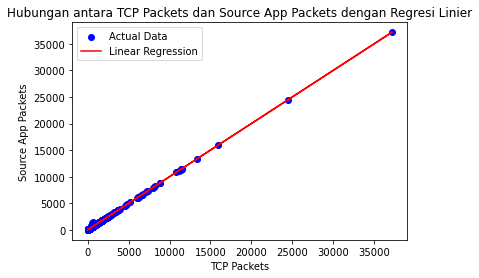

In [23]:
# Buat objek LinearRegression
model = LinearRegression()

# Sesuaikan model dengan data
model.fit(cdata.tcp_packets.values.reshape(-1, 1), cdata.source_app_packets)

predicted_source_app_packets = model.predict(cdata.tcp_packets.values.reshape(-1, 1))

plt.scatter(cdata.tcp_packets, cdata.source_app_packets, color='blue', label='Actual Data')
plt.plot(cdata.tcp_packets, predicted_source_app_packets, color='red', label='Linear Regression')

plt.xlabel('TCP Packets')
plt.ylabel('Source App Packets')
plt.title('Hubungan antara TCP Packets dan Source App Packets dengan Regresi Linier')

plt.legend()

plt.show()
